In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold
from optuna.samplers import TPESampler
import optuna
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

c:\Users\Pc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r'C:\Users\Pc\Desktop\python çalışmaları\data_analytics.csv')

* Önemli Olabilecek Değişkenler : 'PP_MUSTERI_SEGMENTI', 'PP_MESLEK', 'PP_YAS', 'SORU_GELIR_CVP',
'SORU_GELIR_RG', 'ODEMEME_TALEP_ADET', 'BES_AYRILMA_TALEP_ADET', 'HAYAT_AYRILMA_TALEP', 
'ANAPARA', 'GETIRI', 'AKTIF_ILK_POLICE_RG'

In [4]:
önemli_değişkenler = ['PP_MUSTERI_SEGMENTI', 'PP_MESLEK', 'PP_YAS', 'SORU_GELIR_CVP',
'SORU_GELIR_RG', 'ODEMEME_TALEP_ADET', 'BES_AYRILMA_TALEP_ADET', 'HAYAT_AYRILMA_TALEP', 
'ANAPARA', 'GETIRI', 'AKTIF_ILK_POLICE_RG']

In [8]:
df['LABEL'].value_counts().index

Index(['UA', 'HU14', 'HU07', 'HU06', 'HU19', 'HU12', 'HU11', 'HU15'], dtype='object', name='LABEL')

In [51]:
count = df['LABEL'].value_counts(normalize = True) * 100

LABEL
UA      97.660542
HU14     1.261142
HU07     0.437190
HU06     0.372690
HU19     0.089009
HU12     0.079276
HU11     0.051482
HU15     0.048668
Name: proportion, dtype: float64

In [5]:
def label_distribution(df):    
    count = df['LABEL'].value_counts(normalize = True) * 100

    # Grafik oluşturma
    plt.figure(figsize=(10, 6))
    plt.bar(count.index, df['LABEL'].value_counts(), color='skyblue')

    # Grafik başlığı ve etiketler
    plt.xlabel('LABEL')
    plt.ylabel('Percentage (%)')
    plt.title('Target Distribution (Percentage)')
    plt.xticks(rotation=45)  # X eksenindeki etiketleri döndürmek için

    # Yüzde değerlerini grafik üzerinde göstermek için
    for i, v in enumerate(count.values):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

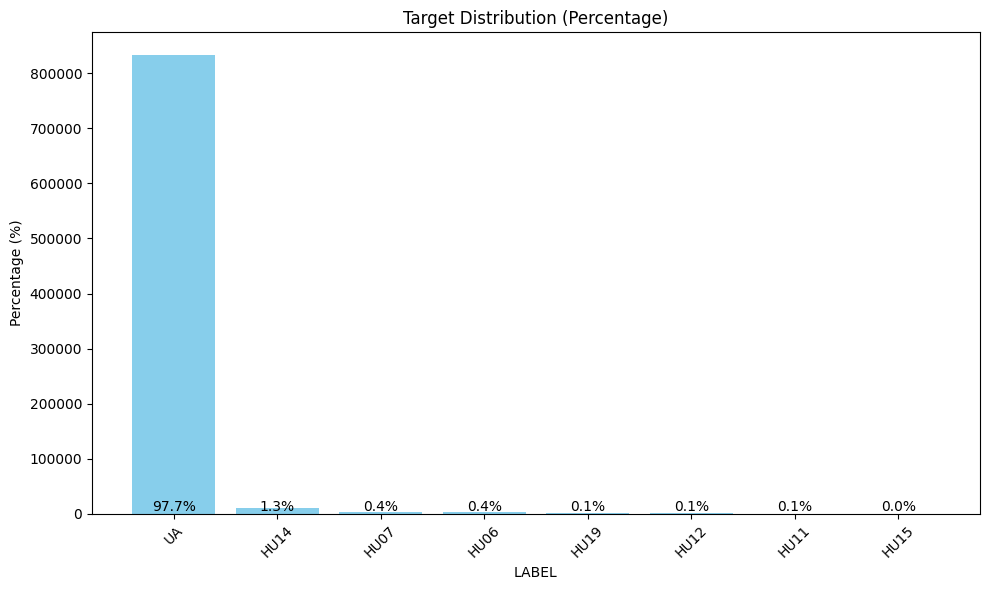

In [38]:
label_distribution(df)

In [10]:
def target_distribution(df):
    plt.subplots(figsize=(6,6))
    count = df.drop(df[df['LABEL'] == 'UA'].index)['LABEL'].value_counts()
    plt.pie(count.values, labels=count.index,autopct='%1.1f%%')   
    plt.title("Target Distribution Without UA")                               
    plt.show()

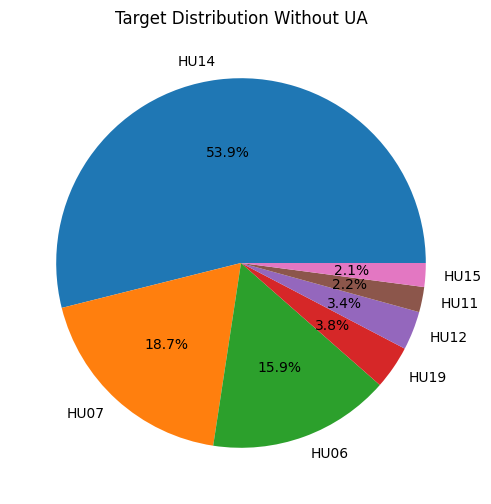

In [39]:
target_distribution(df)

1- EN ÇOK TERCİH EDİLEN İLK 3 SİGORTA:

i) HU14

ii) HU07

iii) HU06

In [24]:
def alanların_almayanlara_oranı(df):    
    HU_çeşidi_oranı_list = []
    for i in ['HU14', 'HU07', 'HU06', 'HU19', 'HU12', 'HU11', 'HU15']:
        df_i = df[df['LABEL'] == i]
        df_i_i = df_i[df_i[i] != 0 ]
        print(f'{i} e sahip olup'' ' 'Daha Önce'' 'f'{i} Alanların'' ' 'Önceden'' ' f'{i} Almamış Olanlara Oranı:',(df_i_i.shape[0] / df_i.shape[0]))
        HU_çeşidi_oranı_list.append({'HU_Type': i, 'Ratio': (df_i_i.shape[0] / df_i.shape[0])})
        HU_çeşidi_oranı = pd.DataFrame(HU_çeşidi_oranı_list)
        

    # Veriyi uzun formata dönüştürelim
    df_melted = HU_çeşidi_oranı.melt(id_vars='HU_Type', var_name='Ratio', value_name='Value')

    # Bar plot oluşturma
    plt.figure(figsize=(12, 8))  # Grafik boyutunu ayarlayın
    sns.barplot(x='HU_Type', y='Value', hue='Ratio', data=df_melted, palette='viridis')

    # Grafik başlığı ve etiketler
    plt.title('ÖNCEDEN ALMIŞ OLANLARIN ALMAYANLARA ORANI')
    plt.xlabel('HU_Type')
    plt.ylabel('Ratio')

HU14 e sahip olup Daha Önce HU14 Alanların Önceden HU14 Almamış Olanlara Oranı: 0.07448391296261855
HU07 e sahip olup Daha Önce HU07 Alanların Önceden HU07 Almamış Olanlara Oranı: 0.0
HU06 e sahip olup Daha Önce HU06 Alanların Önceden HU06 Almamış Olanlara Oranı: 0.024543738200125866
HU19 e sahip olup Daha Önce HU19 Alanların Önceden HU19 Almamış Olanlara Oranı: 0.07114624505928854
HU12 e sahip olup Daha Önce HU12 Alanların Önceden HU12 Almamış Olanlara Oranı: 0.05473372781065089
HU11 e sahip olup Daha Önce HU11 Alanların Önceden HU11 Almamış Olanlara Oranı: 0.01366742596810934
HU15 e sahip olup Daha Önce HU15 Alanların Önceden HU15 Almamış Olanlara Oranı: 0.689156626506024


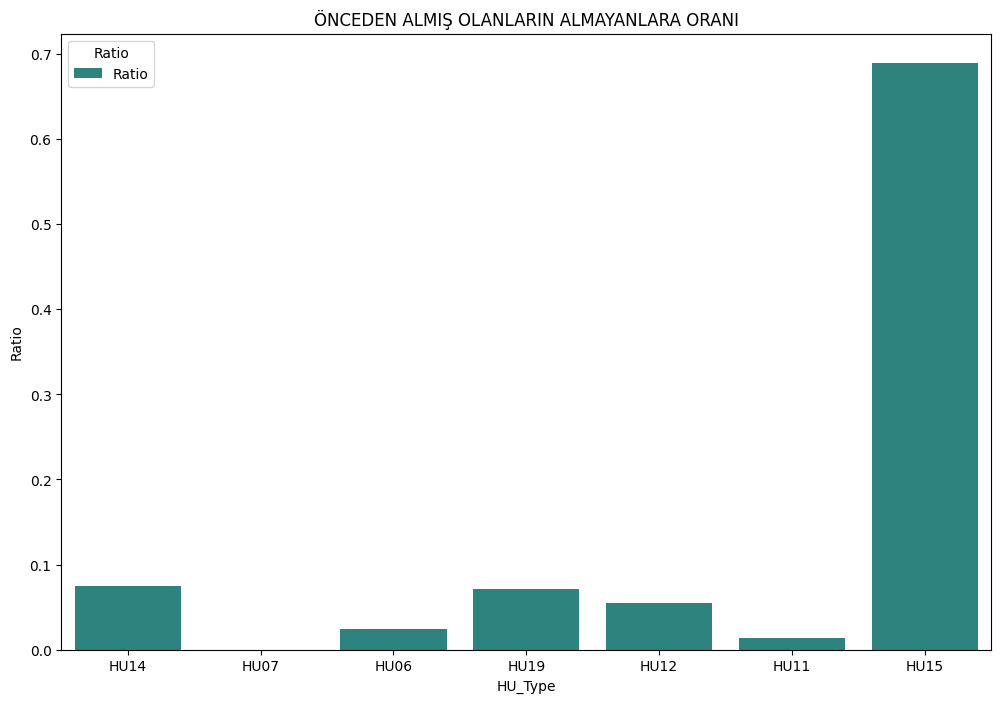

In [25]:
alanların_almayanlara_oranı(df)

1- HU15 ÖNCEDEN ALANLAR ALMAYA DEVAM ETMİŞ 

2- HU07 ALANLAR ARTIK HU07'Yİ TERCİH ETMEMİŞ

3- DİĞER HAYAT SİGORTALARINDA BELİRGİN BİR ÖZELLİK YOK

In [36]:
def ay_bazlı_bilgiler(df):
    index = ['HAZIRAN', 'MAYIS', 'EKIM', 'EYLUL', 'TEMMUZ', 'AGUSTOS']
    data = []
    for i in df['FLAG'].value_counts().index:
        a = df[df['FLAG'] == i][['LABEL']]
        b = a[a['LABEL'] != 'UA'].shape[0]
        data.append({'Müşteri_Sayısı' : a.shape[0], 'Sigortalı_Müşteri_Sayısı' : b, 'Sigorta_Alanların_Almayanlara_Oranı' : np.round((b / a.shape[0]),5)})
        print('Ay:',i)
        print('O Ayın Müşteri Sayısı:', a.shape[0])
        print('Sigortası Olan Müşteri Sayısı:', b)
        print('O Ay Sigorta Satın Alanların Almayanlara Oranı:', np.round((b / a.shape[0]),5))
    result = pd.DataFrame(index = index, data = data)

    result.reset_index(inplace=True)

    result = result.set_index('index').transpose()

    result.reset_index(inplace=True)

    # Veriyi uzun formata dönüştürelim
    df_melted = result.melt(id_vars='index', var_name='Month', value_name='Value')

    for i in df_melted['index'].unique():
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6)) 
        sns.barplot(x='index', y='Value', hue='Month', data=df_melted[df_melted['index'] == i], palette='viridis', ax=ax)

        # Grafik başlığı ve etiketler
        ax.set_title(f'Monthly Values for {i}')
        ax.set_xlabel('LABEL')
        ax.set_ylabel('Value')
        ax.legend(title='Month')

    plt.show()

Ay: HAZIRAN
O Ayın Müşteri Sayısı: 252193
Sigortası Olan Müşteri Sayısı: 3871
O Ay Sigorta Satın Alanların Almayanlara Oranı: 0.01535
Ay: MAYIS
O Ayın Müşteri Sayısı: 246389
Sigortası Olan Müşteri Sayısı: 2781
O Ay Sigorta Satın Alanların Almayanlara Oranı: 0.01129
Ay: EKIM
O Ayın Müşteri Sayısı: 93766
Sigortası Olan Müşteri Sayısı: 3095
O Ay Sigorta Satın Alanların Almayanlara Oranı: 0.03301
Ay: EYLUL
O Ayın Müşteri Sayısı: 89170
Sigortası Olan Müşteri Sayısı: 3778
O Ay Sigorta Satın Alanların Almayanlara Oranı: 0.04237
Ay: TEMMUZ
O Ayın Müşteri Sayısı: 86460
Sigortası Olan Müşteri Sayısı: 3088
O Ay Sigorta Satın Alanların Almayanlara Oranı: 0.03572
Ay: AGUSTOS
O Ayın Müşteri Sayısı: 84741
Sigortası Olan Müşteri Sayısı: 3336
O Ay Sigorta Satın Alanların Almayanlara Oranı: 0.03937


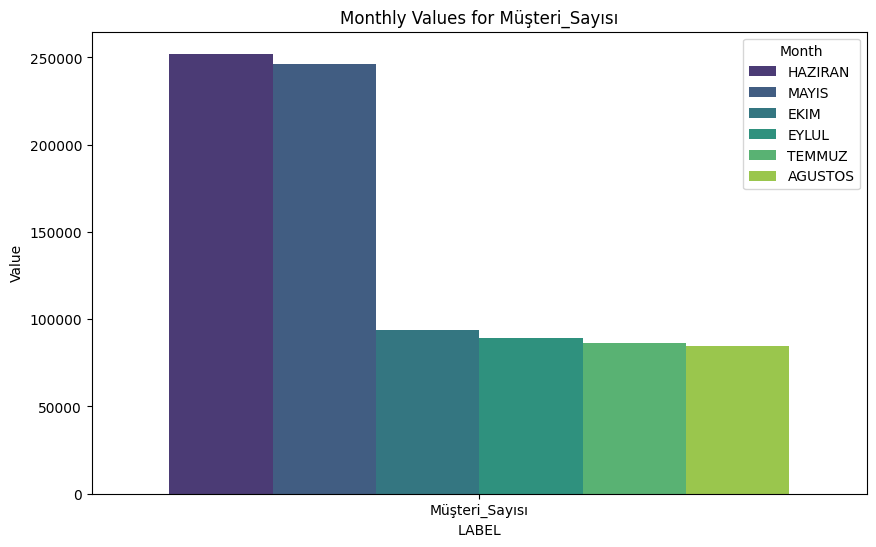

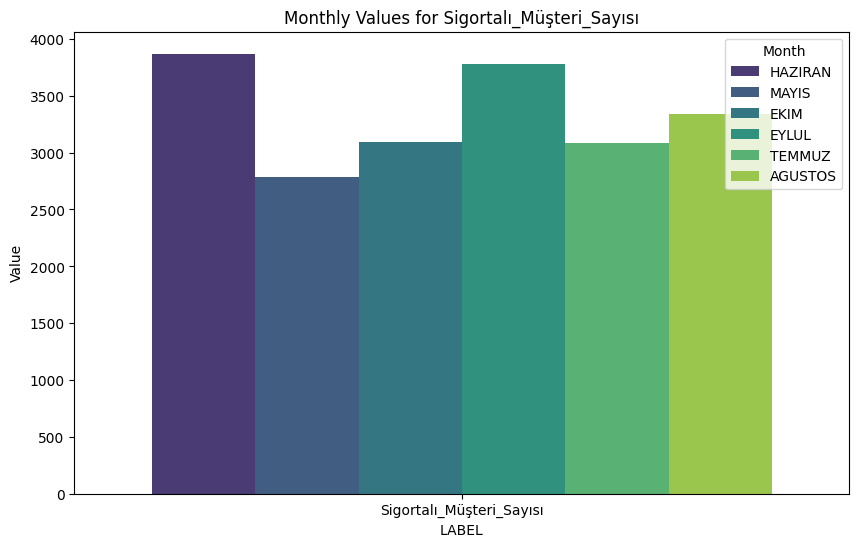

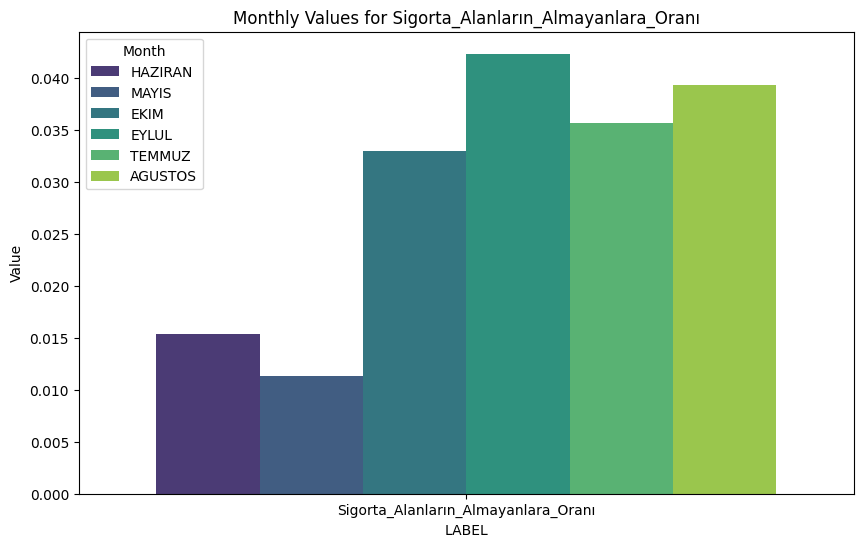

In [37]:
ay_bazlı_bilgiler(df)

1- HAZİRAN VE MAYIS AYLARINDA DİĞER AYLARA GÖRE 2.5-3 KAT FAZLA MÜŞTERİ SAYISI VARDIR

2- AYLARA GÖRE EN ÇOK SİGORTASI OLAN MÜŞTERİ SAYISI : HAZİRAN - EYLÜL - AĞUSTOS - EKİM = TEMMUZ - MAYIS

3- AY BAZINDA SİGORTA SATIN ALMA ORANLARI İSE SIRASIYLA EN FAZLA:  EYLUL - AĞUSTOS - TEMMUZ - EKİM - HAZİRAN VE MAYISTIR

4- EYLÜL AYINDA MÜŞTERİ AZ AMA MÜŞTERİLERİN ÇOĞU DİĞER AYLARA GÖRE SİGORTALI  

5- DATAYI EYLÜL-HAZİRAN VE MAYIS ÖZELİNDE İNCELEYEBİLİRİZ


1- HAZİRAN AYINDA MÜŞTERİ NASIL FAZLA MADEM SİGORTASI YOK KAYDI NASIL VAR KAYDI VARSA NEDEN HAZİRAN AYINDA KAYDI VAR ?

In [40]:
def monthly_values_of_target(df):
    result = pd.DataFrame()  
    for i in df['FLAG'].value_counts().index:
        a_i = df[df['FLAG'] == i]['LABEL'].value_counts().reset_index().rename(columns={'LABEL':f'LABEL_{i}', 'count': i})
        a_ii = a_i.iloc[1:, :]  
        if result.empty:
            result = a_ii
        else:
            result = pd.concat([result, a_ii], axis=1)

    labels = pd.concat([
    result[['LABEL_HAZIRAN', 'HAZIRAN']].rename(columns={'LABEL_HAZIRAN': 'LABEL'}),
    result[['LABEL_MAYIS', 'MAYIS']].rename(columns={'LABEL_MAYIS': 'LABEL'}),
    result[['LABEL_EKIM', 'EKIM']].rename(columns={'LABEL_EKIM': 'LABEL'}),
    result[['LABEL_EYLUL', 'EYLUL']].rename(columns={'LABEL_EYLUL': 'LABEL'}),
    result[['LABEL_TEMMUZ', 'TEMMUZ']].rename(columns={'LABEL_TEMMUZ': 'LABEL'}),
    result[['LABEL_AGUSTOS', 'AGUSTOS']].rename(columns={'LABEL_AGUSTOS': 'LABEL'}),
    ])

    result = labels.groupby('LABEL').sum().reset_index()

    result = result.sort_values(by = 'HAZIRAN', ascending = False)

    # Veriyi uzun formata dönüştürelim
    df_melted = result.melt(id_vars='LABEL', var_name='Month', value_name='Value')

    # Bar plot oluşturma
    plt.figure(figsize=(12, 8))  # Grafik boyutunu ayarlayın
    sns.barplot(x='LABEL', y='Value', hue='Month', data=df_melted, palette='viridis')

    # Grafik başlığı ve etiketler
    plt.title('Monthly Values for Each LABEL')
    plt.xlabel('LABEL')
    plt.ylabel('Value')
    plt.legend(title='Month')
    

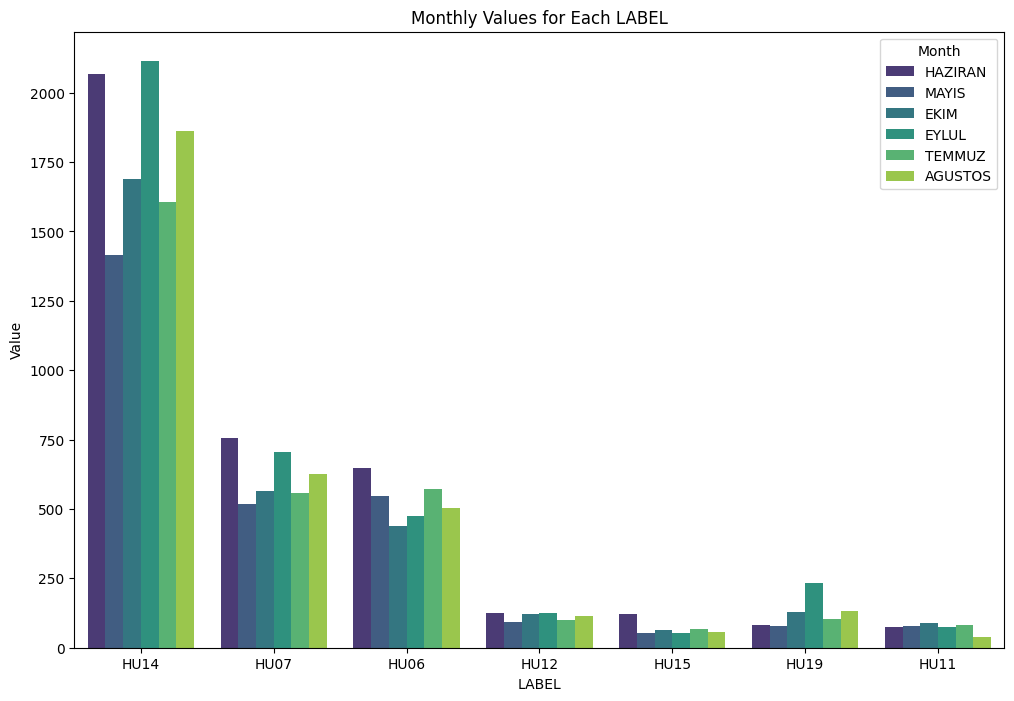

In [41]:
monthly_values_of_target(df)

1- EYLÜL AYINDA HU19 ALIMI DİĞER HAYAT SİGORTA ÇEŞİTLERİNE GÖRE FAZLA ARTIŞ YAŞAMIŞ

In [76]:
def married_per_single_ratio(df):

    df['groupby'] = 1

    df_grouped = df.groupby(['LABEL', 'SORU_MEDENI_HAL_CVP'])['groupby'].sum().reset_index()

    df_married_single_ratio = df_grouped[(df_grouped['SORU_MEDENI_HAL_CVP'] == 'Married') | (df_grouped['SORU_MEDENI_HAL_CVP'] == 'Single')]

    # Pivot tablosu oluşturma
    df_pivot = df_married_single_ratio.pivot(index='LABEL', columns='SORU_MEDENI_HAL_CVP', values='groupby')

    # Oran hesaplama
    df_pivot['Oran'] = df_pivot['Married'] / (df_pivot['Married'] + df_pivot['Single'])

    # Oran hesaplama
    df_pivot['Married_per_Single'] = df_pivot['Married'] / (df_pivot['Single'])

    print(df_pivot.drop(columns = 'Oran'))

In [77]:
married_per_single_ratio(df)

SORU_MEDENI_HAL_CVP  Married  Single  Married_per_Single
LABEL                                                   
HU06                    1824    1102            1.655172
HU07                    2299    1069            2.150608
HU11                     354      65            5.446154
HU12                     518     105            4.933333
HU14                    6587    3612            1.823643
HU15                     249     149            1.671141
HU19                     512     211            2.426540
UA                    465058  336743            1.381047


1- EVLİ OLANLAR HU11 VE HU12'Yİ TERCİH ETMİŞ SIKLIKLA

2- ALMAYANLARIN EVLİ OLUP OLMAMASI ÖNEMLİ DEĞİL

In [79]:
def top_10_meslek_UA(df):
    df['groupby'] = 1
    
    df_grouped = df.groupby(['LABEL', 'PP_MESLEK'])['groupby'].sum().reset_index().sort_values(by = 'PP_MESLEK', ascending = True)

    top_10_meslek_UA_olan = df_grouped[df_grouped['LABEL'] == 'UA'].sort_values(by = 'groupby', ascending = False).iloc[:10,1].values

    return top_10_meslek_UA_olan

In [80]:
top_10_meslek_UA = top_10_meslek_UA(df)
top_10_meslek_UA

array(['İşçi', 'Öğrenci', 'Ev Hanımı', 'Diğer', 'Bilinmiyor', 'Öğretmen',
       'Memur', 'Esnaf', 'Serbest Meslek', 'Mühendis'], dtype=object)

In [110]:
rows_to_consider = df.loc[(df['PP_MESLEK'] == 'Öğrenci') & (df['FLAG'] == 'HAZIRAN') & (df['LABEL'] == 'UA')]

In [111]:
rows_to_consider

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_MEDENI_HAL_CVP,SORU_EGITIM_CVP,...,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG,groupby
6,UA,HAZIRAN,2,223,Öğrenci,105,1,48,Single,(Diğer),...,0,0,0,0,0,0,0,0,3,1
24,UA,HAZIRAN,1,30,Öğrenci,106,1,55,Single,İlköğretim,...,0,0,0,0,0,0,0,0,13,1
52,UA,HAZIRAN,2,329,Öğrenci,106,1,38,Single,İlköğretim,...,0,0,0,0,0,0,0,0,90,1
56,UA,HAZIRAN,1,61,Öğrenci,106,1,34,Single,(Diğer),...,0,0,0,0,0,0,0,0,12,1
64,UA,HAZIRAN,1,149,Öğrenci,106,1,7,Single,(Diğer),...,0,0,0,0,0,0,0,0,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852610,UA,HAZIRAN,1,85,Öğrenci,106,1,33,Single,(Diğer),...,0,0,0,0,0,0,0,0,9,1
852613,UA,HAZIRAN,1,127,Öğrenci,106,1,35,Single,İlköğretim,...,0,0,0,0,0,0,0,0,10,1
852625,UA,HAZIRAN,1,21,Öğrenci,105,1,35,Single,(Diğer),...,0,0,0,0,0,0,0,0,7,1
852631,UA,HAZIRAN,2,95,Öğrenci,106,1,58,Single,(Diğer),...,0,0,0,0,0,0,0,0,18,1


In [112]:
random_sample_indices = rows_to_consider.sample(n=27000, random_state=42).index

In [113]:
random_sample_indices

Index([530521, 243521, 501650, 212974, 392644, 498023,  87434, 371253, 145277,
       838643,
       ...
       154831, 803177, 686482, 102397, 213973, 114741, 674810, 201570, 362883,
       645781],
      dtype='int64', length=27000)

In [114]:
df_filtered = df.drop(random_sample_indices)

In [120]:
df_filtered.to_csv('df_filtered.csv', index=False)